# Segmentation d'images CT du foie en 2D



**Chargement et visualisation des données**

In [1]:
import h5py, numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = '.\db_lits_ds.h5'
f = h5py.File(filename, 'r')

OSError: Unable to open file (unable to open file: name = '.\db_lits_ds.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [7]:
vol = 0
curVol = f[f['ds_volumes'][vol]]
print(curVol.shape)

(75, 64, 64)


In [8]:
curLiver = f[f['ds_livers'][vol]]
print('Shape:', curLiver.shape)
print('Type:', curLiver.dtype)
print('bbmin:', curLiver.attrs['bbmin'])
print('bbmax:', curLiver.attrs['bbmax'])

Shape: (75, 64, 64)
Type: uint8
bbmin: [48 20 11]
bbmax: [72 43 44]


In [9]:
def get_slices_idx(gt):
    bb_z_min = gt.attrs['bbmin'][0]
    bb_zmax = gt.attrs['bbmax'][0]
    slice_range = bb_zmax - bb_z_min
    slice_mid = (bb_zmax + bb_z_min) // 2
    slice_min = slice_mid - slice_range // 8
    slice_max = slice_mid + slice_range // 8

    return slice_min, slice_mid, slice_max


def plot_cur_case(vol_in, gt):

    slice_min, slice_mid, slice_max = get_slices_idx(gt)

    plt.figure(1)
    plt.subplot(2, 3, 1)
    plt.imshow(vol_in[slice_min], cmap='gray')
    plt.subplot(2, 3, 2)
    plt.imshow(vol_in[slice_mid], cmap='gray')
    plt.subplot(2, 3, 3)
    plt.imshow(vol_in[slice_max], cmap='gray')
    #plt.axis('off')
    plt.subplot(2, 3, 4)
    plt.imshow(gt[slice_min], cmap='gray')
    plt.subplot(2, 3, 5)
    plt.imshow(gt[slice_mid], cmap='gray')
    plt.subplot(2, 3, 6)
    plt.imshow(gt[slice_max], cmap='gray')
    plt.show()


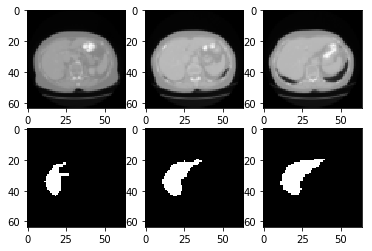

In [10]:
plot_cur_case(curVol, curLiver)

**Analyse de la variabilité selon les métriques choisies**

In [74]:
#This function gives us the cropped image based on the binary mask non zero locations.
def get_segment_crop(img,tol=0, mask=None):
    if mask is None:
        mask = img > tol
    return img[np.ix_(mask.any(1), mask.any(0))]

## Showing all the slices details for a specific Client

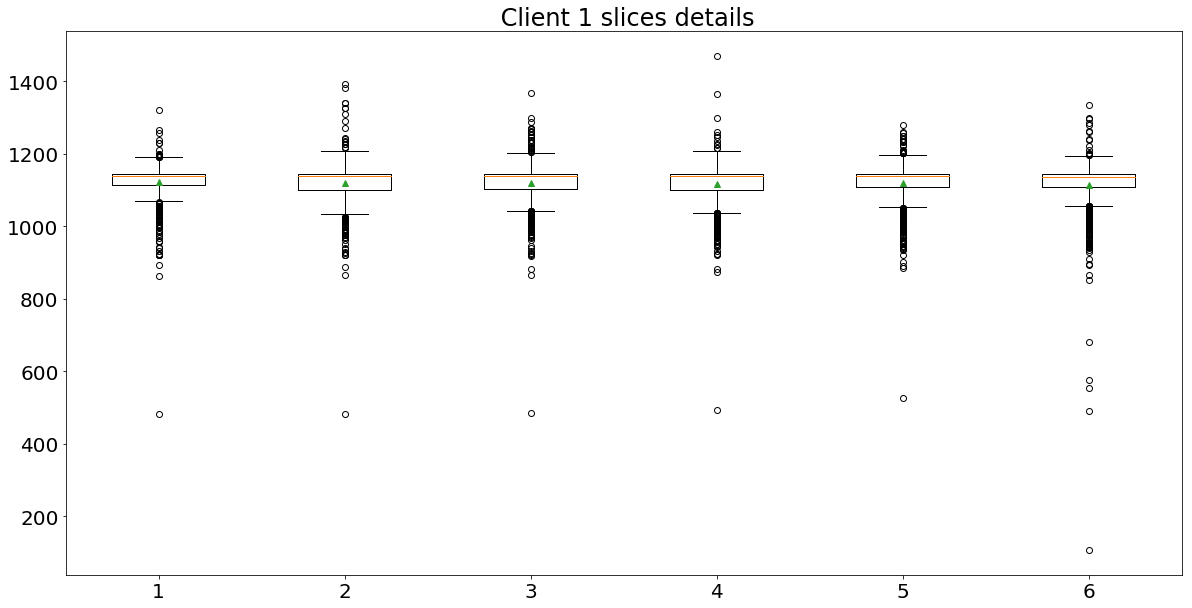

In [138]:
#Change the Client number here! 
vol=1


curVol = f[f['ds_volumes'][vol]]
curLiver = f[f['ds_livers'][vol]]
slice_min, slice_mid, slice_max=get_slices_idx(curLiver)
liver_net=[]
for i in range(slice_min,slice_max):
    test=get_segment_crop(curVol[i],tol=0,mask=curLiver[i])
    liver_net.append(test.ravel())

plt.figure(figsize=(20,10))   
plt.boxplot(liver_net,showmeans=True);
plt.rc('font',size=20)
plt.title(' Client {0} slices details'.format(vol));

## Showing the global details of a specific Client

Average=1077.13
Standard deviation=115.56


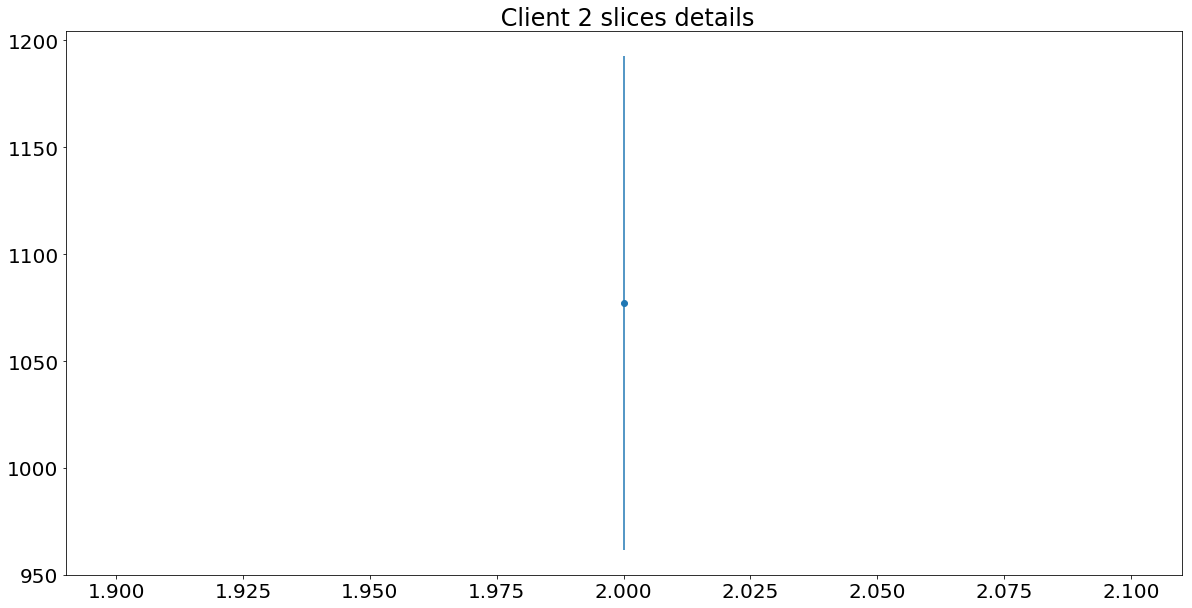

In [150]:
#Change the Client number here! 
vol=2


curVol = f[f['ds_volumes'][vol]]
curLiver = f[f['ds_livers'][vol]]
slice_min, slice_mid, slice_max=get_slices_idx(curLiver)
liver_net=[]
moy=[]
std=[]
for i in range(slice_min,slice_max):
    test=get_segment_crop(curVol[i],tol=0,mask=curLiver[i])
    moy.append(np.mean(test))
    std.append(np.std(test))
    

moy=np.mean(moy)
std=np.mean(std)
plt.figure(figsize=(20,10))   
plt.errorbar(x=vol,y=moy,yerr=std, marker='o');
plt.rc('font',size=20)
plt.title(' Client {0} slices details'.format(vol));
print('Average={0:.2f}'.format(moy))
print('Standard deviation={0:.2f}'.format(std))

In [96]:
x_work=64
y_work=64
last_train_vol=99

In [ ]:
#Pick central slices from liver annotations
def get_slices_idx(gt):
    bb_z_min = gt.attrs['bbmin'][0]
    bb_zmax = gt.attrs['bbmax'][0]
    slice_range = bb_zmax - bb_z_min
    slice_mid = (bb_zmax + bb_z_min) // 2
    slice_min = slice_mid - slice_range // 8
    slice_max = slice_mid + slice_range // 8

    return slice_min, slice_mid, slice_max

In [ ]:
# FILL IN
from skimage.transform import resize
def get_train_and_annotation_data(in_f, x_out, y_out, first_vol_idx, last_vol_idx):
    
    X_data=np.zeros()
    for i in range(first_vol_idx,last_vol_idx):
        
    
    
### Complete code here
    return X_data, Y_data

In [ ]:
#Generation des données d'entrée pour le UNet
X_data, Y_data = get_train_and_annotation_data(f, x_work, y_work, 0, last_train_vol)

** Tensorboard (lancé à partir d'une invit de commande dans l'environnement du TP, a la racine du folder contenant 'tb_dir'

In [ ]:
# Compile model (start from the one presented in TP of D. Mateus last wednesday)
# Set some model compile parameters
optimizer = 'adam'
loss = bce_dice_loss
metrics = [mean_iou]

model = unet_model_compact(img_width=x_work, img_height=y_work)
model.summary()

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

**Rechargement du réseau et test**

In [ ]:
generateTest = False
pickle_test_file = r"dataforTest_2.pickle"
if not generateTest:
    # Loading the objects:
    with open(pickle_test_file, 'rb') as fileptr:
        X_data_test, Y_data_test = pickle.load(fileptr)
else:
    #Mise au format des données de test
    X_data_test, Y_data_test = get_train_and_annotation_data(f, x_work, y_work, last_train_vol+1, nb_total_volumes-1)

In [ ]:
from keras.models import model_from_json
load_model = True
if load_model:
    # Model reconstruction from JSON file
    with open('model_architecture.json', 'r') as fileptr:
        loaded_model = model_from_json(fileptr.read())

    # Load weights into the new model
    loaded_model.load_weights('weights.Final-LR.hdf5')

#Test on all test base
out_all_test = loaded_model.predict(X_data_test)